In [1]:
import pandas as pd
data_working = pd.read_csv('../raw_data/working.csv')

In [3]:
def tokenize_text(text):
    return len(text.split())
data_working['len_text'] = data_working['text'].apply(tokenize_text)


In [4]:
data_working['len_title'] = data_working['title'].apply(tokenize_text)

c:\users\liamc\.venvs\lewagon\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 5000.0)

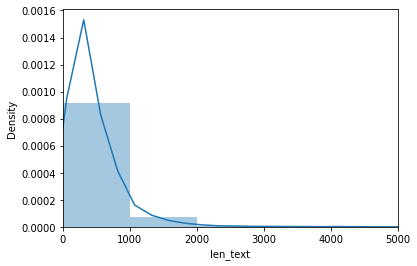

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

lenght = data_working['len_text']

sns.distplot(lenght);
plt.xlim((0,5000))

In [6]:
lenght_2 = data_working['len_title']

c:\users\liamc\.venvs\lewagon\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


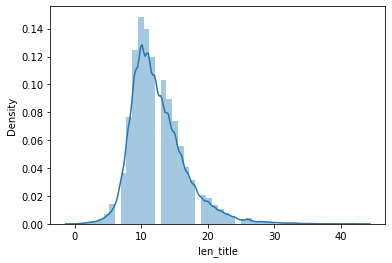

In [7]:
sns.distplot(lenght_2);

In [39]:
import trafilatura
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
def get_title_text_web(url):
    downloaded = trafilatura.fetch_url(url)
    if downloaded == None:
        title = 'Not working text'
        text = 'Not working title'
        check = 'fake'
        dictio = {'title':[title], 'text':[text], 'check': check}
        df = pd.DataFrame(dictio, columns=['title','text','check'])
        return df      
    text = trafilatura.extract(downloaded)
    html = request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find('title').string
    dictio = {'title':[title], 'text':[text], 'check': True}
    df = pd.DataFrame(dictio, columns=['title','text','check'])
    return df


In [40]:
get_title_text_web('ahshjsnksxbjdsxnkjsnakjsnksdn')

,title,text,check
0,Not working text,Not working title,fake


In [41]:
get_title_text_web('https://www.bbc.com/news/world-asia-china-55140848')

,title,text,check
0,China refuses to apologise to Australia for fa...,China refuses to apologise to Australia for fa...,True
